### STOCK PRICE PREDICTION AND FORECASTING USING STACKED LSTM

In [2]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import math
from sklearn.metrics import mean_squared_error

In [13]:
df = yf.download("NVDA", start="2020-01-01", end="2023-12-31")


[*********************100%***********************]  1 of 1 completed


In [14]:
df.to_csv('updated_nvda_stock_data.csv')

In [17]:
df = pd.read_csv('updated_nvda_stock_data.csv')

In [18]:
df.head()

,Price,Close,High,Low,Open,Volume
0,2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000
1,2020-01-03,5.877112,5.920929,5.828068,5.852964,205384000
2,2020-01-06,5.901757,5.906985,5.757611,5.783752,262636000
3,2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000
4,2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000


In [19]:
len(df)

1006

In [20]:
df.isnull().sum()

Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [21]:
df.describe()

,Close,High,Low,Open,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,21.070585,21.451116,20.651922,21.057599,4.642033e+08
std,11.756655,11.935926,11.572673,11.770087,1.897755e+08
min,4.892426,5.229715,4.500833,4.984595,9.788400e+07
25%,13.127092,13.347937,12.915662,13.105958,3.314385e+08
50%,17.574623,17.902698,17.028869,17.482176,4.373750e+08
75%,26.508285,26.989456,26.133148,26.524959,5.657198e+08
max,50.390285,50.529234,49.397996,50.193218,1.543911e+09


In [22]:
df1 = df.reset_index()['Close']

In [23]:
df1[1:]

1        5.877112
2        5.901757
3        5.973208
4        5.984412
5        6.050137
          ...    
1001    48.816162
1002    49.265030
1003    49.402988
1004    49.507965
1005    49.507965
Name: Close, Length: 1005, dtype: float64

In [25]:
df1.shape

(1006,)

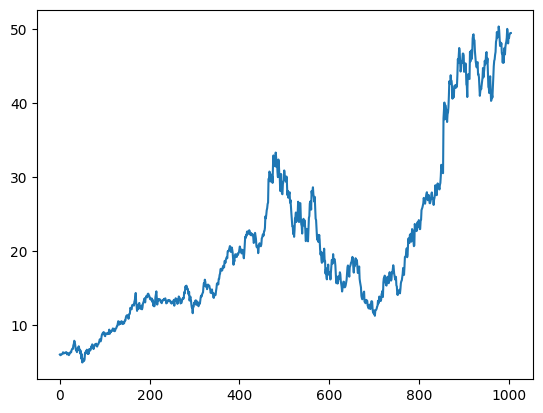

In [26]:
# visualising data

plt.plot(df1)

In [27]:
# scaling data

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
df1.shape

(1006, 1)

In [29]:
df1

array([[0.02374364],
       [0.02164248],
       [0.02218414],
       ...,
       [0.97830014],
       [0.98060743],
       [0.98060743]])

In [30]:
# Splitting dataset into train and test split

training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size

train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [31]:
test_data

array([[0.30929548],
       [0.28304213],
       [0.26752287],
       [0.28971527],
       [0.28631286],
       [0.30314917],
       [0.31023939],
       [0.30688092],
       [0.29493964],
       [0.30455409],
       [0.28427144],
       [0.26638143],
       [0.26960819],
       [0.27050825],
       [0.28567628],
       [0.24939139],
       [0.23931591],
       [0.23200629],
       [0.22379661],
       [0.19839936],
       [0.19203359],
       [0.18803849],
       [0.19359373],
       [0.19965399],
       [0.20837113],
       [0.21096209],
       [0.18079255],
       [0.18072671],
       [0.17635713],
       [0.18226369],
       [0.18630385],
       [0.18178063],
       [0.18364702],
       [0.1682768 ],
       [0.16728873],
       [0.16096496],
       [0.16502709],
       [0.17211939],
       [0.16078929],
       [0.15901074],
       [0.16720088],
       [0.18158305],
       [0.18250522],
       [0.18077059],
       [0.15762741],
       [0.14871267],
       [0.14686828],
       [0.144

In [32]:
def create_dataset(dataset, time_step=1):
    X_data, Y_data = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        X_data.append(a)
        Y_data.append(dataset[i + time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [33]:
time_step = 75
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [34]:
print(X_train.shape, y_train.shape)

(577, 75) (577,)


In [35]:
print(X_test.shape, y_test.shape)

(277, 75) (277,)


In [36]:
X_train.shape[1]

75

In [38]:
# creating a stacked LSTM model

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(75,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 75, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 75, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100


I0000 00:00:1735018250.625312   73945 cuda_dnn.cc:529] Loaded cuDNN version 90300


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 0.0226 - val_loss: 0.0164
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0029 - val_loss: 0.0060
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0019 - val_loss: 0.0084
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0016 - val_loss: 0.0107
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0017 - val_loss: 0.0050
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0014 - val_loss: 0.0087
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0015 - val_loss: 0.0097
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.

In [41]:
# model prediction

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [42]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [43]:
# RMSE performance metrics

math.sqrt(mean_squared_error(y_train, train_predict))

17.73896643835623

In [44]:
math.sqrt(mean_squared_error(y_test, test_predict))

33.90933774817218

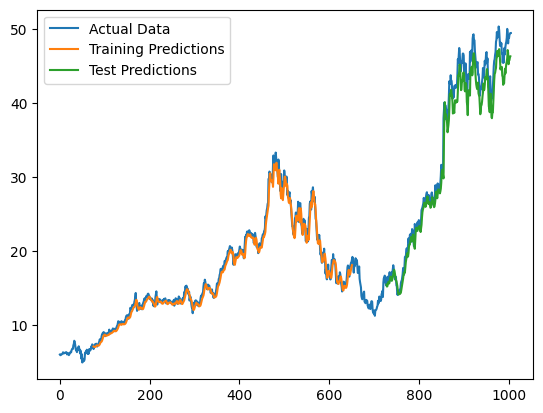

In [45]:
look_back = 75

# Initialize arrays for plotting
training_prediction_plot = np.empty_like(df1)
training_prediction_plot[:, :] = np.nan
training_prediction_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :] = np.nan

# Correct the slice indexing
start_idx = len(train_predict) + (look_back * 2) + 1
end_idx = start_idx + len(test_predict)
test_predict_plot[start_idx:end_idx, :] = test_predict

# Plot the results
plt.plot(scaler.inverse_transform(df1), label="Actual Data")
plt.plot(training_prediction_plot, label="Training Predictions")
plt.plot(test_predict_plot, label="Test Predictions")
plt.legend()
plt.show()


In [46]:
len(test_data)

353

In [59]:
X_input = test_data[303:].reshape(-1,1)
X_input.shape

(50, 1)

In [50]:
temp_input = list(X_input)
temp_input

[array([0.81746578]),
 array([0.8017785]),
 array([0.83666827]),
 array([0.85178416]),
 array([0.81039098]),
 array([0.77846743]),
 array([0.78229035]),
 array([0.79681313]),
 array([0.78844211]),
 array([0.8223873]),
 array([0.84833484]),
 array([0.88126921]),
 array([0.89765943]),
 array([0.90214162]),
 array([0.91574153]),
 array([0.92400254]),
 array([0.95443218]),
 array([0.96069394]),
 array([0.98345576]),
 array([0.96658227]),
 array([0.97958898]),
 array([0.97559032]),
 array([1.]),
 array([0.98978342]),
 array([0.96280319]),
 array([0.94215062]),
 array([0.95238891]),
 array([0.94313922]),
 array([0.95014803]),
 array([0.92004773]),
 array([0.91993789]),
 array([0.89236438]),
 array([0.91565576]),
 array([0.89229857]),
 array([0.91631485]),
 array([0.93631017]),
 array([0.91699608]),
 array([0.93962802]),
 array([0.94909839]),
 array([0.95485525]),
 array([0.96672061]),
 array([0.99280229]),
 array([0.98240914]),
 array([0.94960363]),
 array([0.96891789]),
 array([0.96540225])

In [57]:
temp_input = [float(value) for array in temp_input for value in array]

print(temp_input)  


[0.8174657780141884, 0.8017785018218185, 0.8366682744695232, 0.8517841575861859, 0.8103909843060059, 0.7784674250452966, 0.7822903507503522, 0.7968131253391271, 0.788442111975708, 0.8223873043752956, 0.8483348382707637, 0.8812692141009121, 0.8976594337337412, 0.9021416204445617, 0.9157415302373996, 0.9240025410013571, 0.954432177764201, 0.960693941589018, 0.9834557599592363, 0.9665822667110912, 0.9795889841325968, 0.9755903225674264, 1.0000000000000002, 0.9897834247315965, 0.9628031911276197, 0.9421506222960031, 0.9523889130165869, 0.9431392203525938, 0.9501480292697883, 0.9200477295577708, 0.9199378946451989, 0.8923643848264452, 0.9156557583934598, 0.8922985677223468, 0.9163148517123353, 0.9363101717808601, 0.9169960797006144, 0.9396280245749747, 0.9490983931854481, 0.9548552517862138, 0.9667206083948648, 0.9928022918018707, 0.9824091422389053, 0.9496036337832782, 0.9689178935504134, 0.9654022540702246, 0.9752679445225115, 0.9783001427004948, 0.9806074304555047, 0.9806074304555047]


In [52]:
len(temp_input)

50

In [60]:
from numpy import array

list_output = []
n_steps = 50
i = 0

while i < 30:
    if len(temp_input) > n_steps:
        X_input = np.array(temp_input[-n_steps:]) 
    else:
        X_input = np.array(temp_input)  
        X_input = np.pad(X_input, (n_steps - len(X_input), 0), 'constant', constant_values=0)
    
    print(f"{i} day input {X_input}")
    X_input = X_input.reshape((1, n_steps, 1))  

    y_hat = model.predict(X_input, verbose=0)
    print(f"{i} day output {y_hat}")

    temp_input.extend(y_hat[0].tolist()) 
    temp_input = temp_input[-n_steps:] 
    list_output.extend(y_hat.tolist())  
    
    i += 1

print(list_output)


0 day input [0.81746578 0.8017785  0.83666827 0.85178416 0.81039098 0.77846743
 0.78229035 0.79681313 0.78844211 0.8223873  0.84833484 0.88126921
 0.89765943 0.90214162 0.91574153 0.92400254 0.95443218 0.96069394
 0.98345576 0.96658227 0.97958898 0.97559032 1.         0.98978342
 0.96280319 0.94215062 0.95238891 0.94313922 0.95014803 0.92004773
 0.91993789 0.89236438 0.91565576 0.89229857 0.91631485 0.93631017
 0.91699608 0.93962802 0.94909839 0.95485525 0.96672061 0.99280229
 0.98240914 0.94960363 0.96891789 0.96540225 0.97526794 0.97830014
 0.98060743 0.98060743]
0 day output [[0.9118765]]
1 day input [0.8017785  0.83666827 0.85178416 0.81039098 0.77846743 0.78229035
 0.79681313 0.78844211 0.8223873  0.84833484 0.88126921 0.89765943
 0.90214162 0.91574153 0.92400254 0.95443218 0.96069394 0.98345576
 0.96658227 0.97958898 0.97559032 1.         0.98978342 0.96280319
 0.94215062 0.95238891 0.94313922 0.95014803 0.92004773 0.91993789
 0.89236438 0.91565576 0.89229857 0.91631485 0.9363101

In [71]:
day_new = np.arange(1, len(df1[986:]) + 1)
day_pred = np.arange(51, 76)


In [72]:
day_new

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [64]:
df3 = df1.tolist()
df3.extend(list_output)

In [75]:
df1_inverse = scaler.inverse_transform(df1[986:]).flatten()  # Flatten the actual data
list_output_inverse = scaler.inverse_transform(np.array(list_output)).flatten()  # Flatten predictions

day_new = np.arange(1, len(df1_inverse) + 1)  # Actual data timeframe
day_pred = np.arange(len(df1_inverse) + 1, len(df1_inverse) + len(list_output) + 1)  # Predictions timeframe

# plt.figure(figsize=(10, 6))
# plt.plot(day_new, df1_inverse, label="Actual Data", color="blue")
# plt.plot(day_pred, list_output_inverse, label="Predictions", color="orange")
# plt.xlabel("Days")
# plt.ylabel("Values")
# plt.title("Actual Data vs Predictions")
# plt.legend()
# plt.grid(True)
# plt.show()
